In [ ]:
import numpy as np
from pandas import read_csv, DataFrame
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.preprocessing import image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns
from sklearn.model_selection import train_test_split

path_to_model = r'C:/bauman/git_bauman/ebw_model'
path_to_data  = r"C:/bauman/git_bauman/data/ebw_data.csv"

dataset = pd.read_csv(path_to_data)
#dataset.head()
#dataset.describe()

# посмотрели есть ли выпадения данных
print('percentage of NaN cells:')
print(dataset.isna().sum() / dataset.shape[0] *100)


# нормализация и запоминание мин и макс по столбцам
maxdataset = dataset[['IW','IF','VW','FP','Depth','Width']].max()
mindataset = dataset[['IW','IF','VW','FP','Depth','Width']].min()

maxIW = maxdataset['IW'] 
minIW = mindataset['IW'] 
normIW = (dataset['IW'] - minIW ) / (maxIW - minIW )

maxIF = maxdataset['IF'] 
minIF = mindataset['IF'] 
normIF = (dataset['IF'] - minIF ) / (maxIF - minIF )

maxVW = maxdataset['VW'] 
minVW = mindataset['VW'] 
normVW = (dataset['VW'] - minVW ) / (maxVW - minVW )

maxFP = maxdataset['FP'] 
minFP = mindataset['FP'] 
normFP = (dataset['FP'] - minFP ) / (maxFP - minFP )

maxDepth = maxdataset['Depth'] 
minDepth = mindataset['Depth'] 
normDepth = (dataset['Depth'] - minDepth ) / (maxDepth - minDepth )

maxWidth = maxdataset['Width'] 
minWidth = mindataset['Width'] 
normWith = (dataset['Width'] - minWidth ) / (maxWidth - minWidth )

minmax = pd.DataFrame({'maxDepth': maxDepth,
                       'minDepth': minDepth,
                       'minWidth': minWidth,
                       'maxWidth': maxWidth,
                       'minIW': minIW,
                       'maxIW': maxIW,
                       'minIF': minIF,
                       'maxIF': maxIF,
                       'minVW': minVW,
                       'maxVW': maxVW,
                       'minFP': minFP,
                       'maxFP': maxFP,
                        }, index=[0])
minmax.to_csv(path_to_model + r'/minmax.csv')

normdataset = pd.DataFrame({'IW': normIW, 
                            'IF': normIF,
                            'VW': normVW,
                            'FP': normFP,
                            'Depth': normDepth,
                            'Width': normWith,
                            })

# переменные для входных и выходных данных
X = normdataset[['IW','IF','VW','FP']]
Y = normdataset[['Depth','Width']] 

# делим выборку и перемешиваем
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.05, shuffle = True)

# создаем модель
model = Sequential()
model.add(Dense(4, activation = 'sigmoid'))
model.add(Dense(2, activation = 'sigmoid'))
model.compile( loss = 'mse',optimizer = 'adam', metrics = ['accuracy'] )

history = model.fit(X_train,Y_train, epochs = 1000, validation_data = (X_train,Y_train), verbose = 1)

model.save(path_to_model)

# для инфомации выводим кривую обучения
plt.plot(history.history['accuracy'],label = 'Обучающая выборка')
plt.plot(history.history['val_accuracy'],label = 'Точность тест')
plt.title('Обучение')
plt.xlabel('эпохи')
plt.ylabel(model.loss)

In [1]:
# делаем предсказание
# данный код будет выполняться на сервере
import keras
import pandas as pd

path_to_model = r''

human_input = pd.DataFrame({'IW': [47],
                            'IF': [134],
                            'VW': [10],
                            'FP': [110]})


minmax = pd.read_csv(path_to_model + r'/minmax.csv')

human_input['IW'] = (human_input['IW'] - minmax.minIW) / (minmax.maxIW - minmax.minIW)
human_input['IF'] = (human_input['IF'] - minmax.minIF) / (minmax.maxIF - minmax.minIF)
human_input['VW'] = (human_input['VW'] - minmax.minVW) / (minmax.maxVW - minmax.minVW)
human_input['FP'] = (human_input['FP'] - minmax.minFP) / (minmax.maxFP - minmax.minFP)


model= keras.models.load_model(path_to_model)

mypredcit = model.predict(human_input)

predict = pd.DataFrame({'Depth': mypredcit[:,0]*(minmax.maxDepth-minmax.minDepth)+minmax.minDepth, 
                        'Width': mypredcit[:,1]*(minmax.maxWidth-minmax.minWidth)+minmax.minWidth})

# тестовые значение для ответа: 0.92	1.86
 
print(predict)

#print("Predicted Depth: ",predict.Depth)
#print("Predicted Width: ",predict.Width)


1/1 [==============================] - 0s 55ms/step
      Depth     Width
0  1.133488  1.923074


percentage of NaN cells:
IW       0.0
IF       0.0
VW       0.0
FP       0.0
Depth    0.0
Width    0.0
dtype: float64
0   ->  LinearRegression()  :  F(IW,IF,VW,FP) vs  Depth  R2_Y 0.9585428698175245
1   ->  LinearRegression()  :  F(IW,IF,VW,FP) vs  Width  R2_Y 0.9812146004107016
0   ->  RandomForestRegressor(max_features='sqrt')  :  F(IW,IF,VW,FP) vs  Depth  R2_Y 0.8989722348214226
1   ->  RandomForestRegressor(max_features='sqrt')  :  F(IW,IF,VW,FP) vs  Width  R2_Y 0.9792704455928253


C:\Users\HeroPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\HeroPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\HeroPC\AppData\Local\Temp\ipykernel_9728\1890425307.py:131: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])
C:\Users\HeroPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted 

0   ->  KNeighborsRegressor(n_neighbors=6)  :  F(IW,IF,VW,FP) vs  Depth  R2_Y 0.8978026533996682
1   ->  KNeighborsRegressor(n_neighbors=6)  :  F(IW,IF,VW,FP) vs  Width  R2_Y 0.9848484848484849
0   ->  SVR(kernel='linear')  :  F(IW,IF,VW,FP) vs  Depth  R2_Y 0.8526327382684638
1   ->  SVR(kernel='linear')  :  F(IW,IF,VW,FP) vs  Width  R2_Y 0.9899618403667081


C:\Users\HeroPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
C:\Users\HeroPC\AppData\Local\Temp\ipykernel_9728\1890425307.py:131: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])
C:\Users\HeroPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
C:\Users\HeroPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warn

,R2_Y1,R2_Y2
Model,,
LinearRegression,0.958543,0.981215
RandomForestRegressor,0.898972,0.979270
KNeighborsRegressor,0.897803,0.984848
SVR,0.852633,0.989962


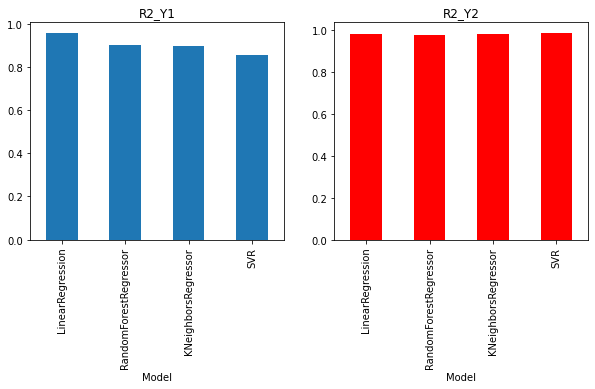

In [114]:
import numpy as np
import array 
from pandas import read_csv, DataFrame
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.preprocessing import image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

path_to_model = r'C:/bauman/git_bauman/ebw_model'
path_to_data  = r"C:/bauman/git_bauman/data/ebw_data.csv"

dataset = pd.read_csv(path_to_data)
#dataset.head()
#dataset.describe()

# посмотрели есть ли выпадения данных
print('percentage of NaN cells:')
print(dataset.isna().sum() / dataset.shape[0] *100)

#смотрим корреляцию между столбцами
dataset.corr()
#особенное какой-то корреляции не видно, максимальная между VW и Width = -0,87 и VW и Depth = -0,67
# попробуем разные методы 

# нормализация и запоминание мин и макс по столбцам
# для регрессси не нужно, но нужно для ИНС. Сделаем для общего подхода к решению
maxdataset = dataset[['IW','IF','VW','FP','Depth','Width']].max()
mindataset = dataset[['IW','IF','VW','FP','Depth','Width']].min()

maxIW = maxdataset['IW'] 
minIW = mindataset['IW'] 
normIW = (dataset['IW'] - minIW ) / (maxIW - minIW )

maxIF = maxdataset['IF'] 
minIF = mindataset['IF'] 
normIF = (dataset['IF'] - minIF ) / (maxIF - minIF )

maxVW = maxdataset['VW'] 
minVW = mindataset['VW'] 
normVW = (dataset['VW'] - minVW ) / (maxVW - minVW )

maxFP = maxdataset['FP'] 
minFP = mindataset['FP'] 
normFP = (dataset['FP'] - minFP ) / (maxFP - minFP )

maxDepth = maxdataset['Depth'] 
minDepth = mindataset['Depth'] 
normDepth = (dataset['Depth'] - minDepth ) / (maxDepth - minDepth )

maxWidth = maxdataset['Width'] 
minWidth = mindataset['Width'] 
normWith = (dataset['Width'] - minWidth ) / (maxWidth - minWidth )

# сохраним для случая использования модели отдельно от программы обучения
minmax = pd.DataFrame({'maxDepth': maxDepth,
                       'minDepth': minDepth,
                       'minWidth': minWidth,
                       'maxWidth': maxWidth,
                       'minIW': minIW,
                       'maxIW': maxIW,
                       'minIF': minIF,
                       'maxIF': maxIF,
                       'minVW': minVW,
                       'maxVW': maxVW,
                       'minFP': minFP,
                       'maxFP': maxFP,
                        }, index=[0])
minmax.to_csv(path_to_model + r'/minmax.csv')

#собираем dataset для обучения
normdataset = pd.DataFrame({'IW': normIW, 
                            'IF': normIF,
                            'VW': normVW,
                            'FP': normFP,
                            'Depth': normDepth,
                            'Width': normWith,
                            })

# переменные для входных и выходных данных
X = normdataset[['IW','IF','VW','FP']]
Y = normdataset[['Depth','Width']] 

# делим выборку и перемешиваем
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.05, shuffle = True)


# создаем набор моделей
models_set = [LinearRegression(),  
	          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), 
	          KNeighborsRegressor(n_neighbors=6),  
	          SVR(kernel='linear') 
	          ]

 
TestModels = DataFrame()
tmp = {}

currR2 = array.array('i',[0,0])

for model in models_set:
   
    m = str(model)
    tmp['Model'] = m[:m.index('(')]    
   
    for i in  range(Y_train.shape[1]):
    
        model.fit(X_train.to_numpy(), Y_train.iloc[:,i].to_numpy()) 
     
        r2 = r2_score(Y_test.iloc[:,i].to_numpy(), model.predict(X_test))
        tmp['R2_Y%s'%str(i+1)] = r2

        #if (r2>currR2[i]):
        print(i,"  -> ",m," :  F(IW,IF,VW,FP) vs ",Y_train.columns[i]," R2_Y" ,r2)
           # currR2[i] = r2


 
    TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)

fig, axes = plt.subplots(ncols=2, figsize=(10,4))
TestModels.R2_Y1.plot(ax=axes[0], kind='bar', title='R2_Y1')
TestModels.R2_Y2.plot(ax=axes[1], kind='bar', color='red', title='R2_Y2')

TestModels




In [112]:
X_train.to_numpy()

array([[0.        , 0.78947368, 0.6       , 0.13333333],
       [0.66666667, 0.42105263, 0.        , 0.4       ],
       [0.33333333, 0.47368421, 0.46666667, 0.4       ],
       [0.66666667, 0.42105263, 0.        , 0.4       ],
       [0.33333333, 0.78947368, 0.6       , 0.13333333],
       [1.        , 0.05263158, 0.46666667, 1.        ],
       [0.        , 0.78947368, 0.6       , 0.13333333],
       [0.16666667, 0.78947368, 0.6       , 0.13333333],
       [0.66666667, 0.15789474, 0.73333333, 0.8       ],
       [0.5       , 0.78947368, 0.73333333, 0.13333333],
       [0.5       , 0.78947368, 0.73333333, 0.13333333],
       [0.33333333, 0.52631579, 0.73333333, 0.4       ],
       [0.83333333, 0.        , 0.73333333, 1.        ],
       [0.66666667, 0.47368421, 0.73333333, 0.4       ],
       [0.33333333, 0.78947368, 0.6       , 0.13333333],
       [0.33333333, 0.47368421, 0.        , 0.4       ],
       [0.16666667, 0.78947368, 0.6       , 0.13333333],
       [0.33333333, 0.78947368,